# Visualizing dyad

Consider an image from `skimage.data`. For simplicity, say that $X$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

- Load the image into memory and compute its SVD;
- Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
- Plot the singular values of $X$. Do you note something?
- Visualize the $k$-rank approximation of $X$ for different values of $r$. What do you observe?
- Compute and plot the approximation error $\|X - X_k\|_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $X$.
- Plot the compression factor: $c_k=1-\frac{k (m + n+1)}{m  n}$ for increasing values of $k$.
- Compute the value $k$ such that $c_k=0$ (i.e. when the compressed image requires the same amount of information as the uncompressed image). What is the approximation error for this value of $k$? Comment.

In [13]:
import numpy as np
from skimage import data, color
import matplotlib.pyplot as plt

- Load the image into memory and compute its SVD;

Shape of the image: (512, 512)


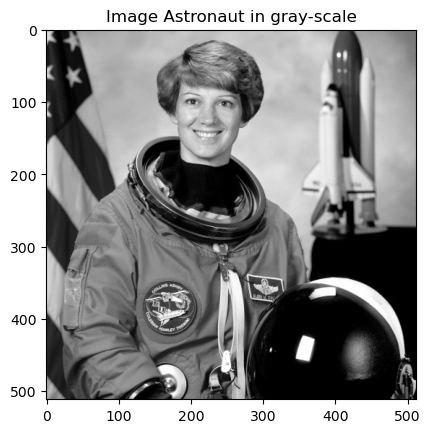

In [14]:
# i choose from the data library the astronaut's image
img = data.astronaut()
# as it is a colored image, i transfrom the image in grey scale
X = color.rgb2gray(img)
print(f"Shape of the image: {X.shape}")

# show image choose
plt.imshow(X, cmap="gray")
plt.title("Image Astronaut in gray-scale")
plt.show()

In [15]:
# implementing SVD
U, s, VT = np.linalg.svd(X, full_matrices=False)
print(U.shape, s.shape, VT.shape)

(512, 512) (512,) (512, 512)


- Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?

I will print only 5 dyads, to show that the first dyad contains the most information (as it is associated with the largest singular value).

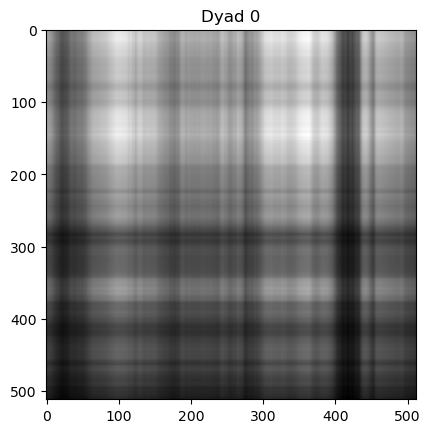

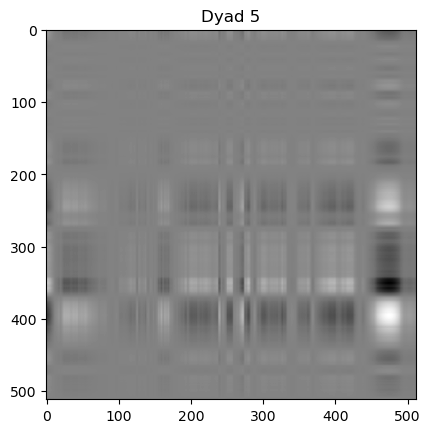

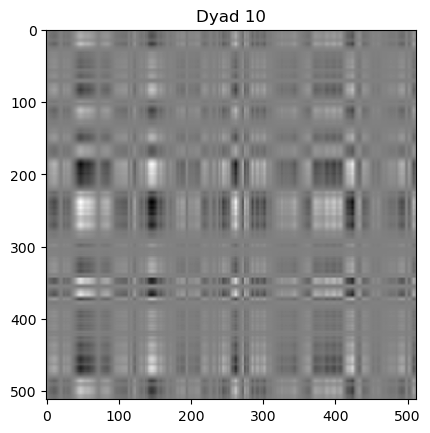

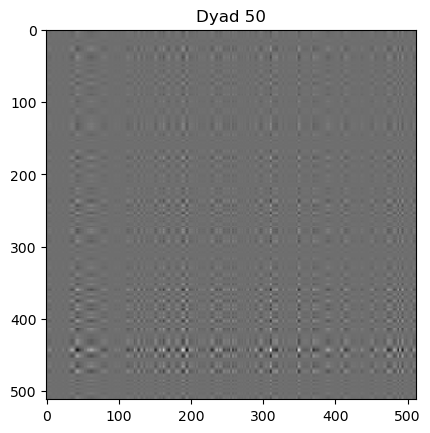

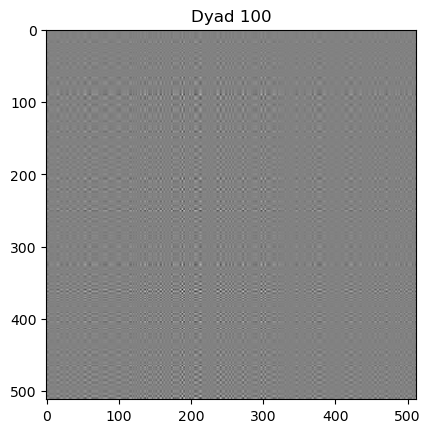

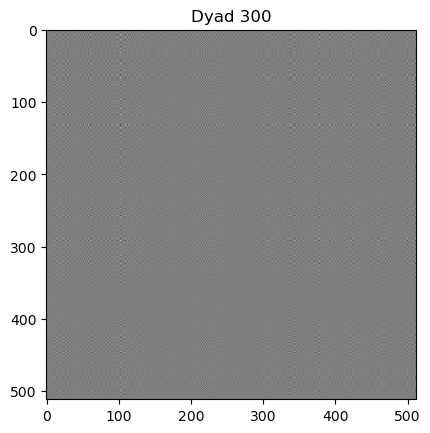

In [16]:
# i just want to show 5 dyads choosing different singular values
values = [0, 5, 10, 50, 100, 300]
for i in values:
    # singular value
    sigma_i = s[i]
    
    # rank-1 matrix
    u_i = U[:,i] 
    v_i = VT[i,:]
    
    # dyad
    dyad = sigma_i * np.outer(u_i,v_i)
    
    # show dyad
    plt.imshow(dyad, cmap="gray")
    plt.title(f"Dyad {i}")
    plt.show()


It’s easy to observe that as $\sigma_i$ decreases, the output becomes increasingly negligible, as we are multiplying a dyad by a very small number (the $\sigma_i$ values are ordered in decreasing magnitude in the vector $s$).

- Plot the singular values of $X$. Do you note something?

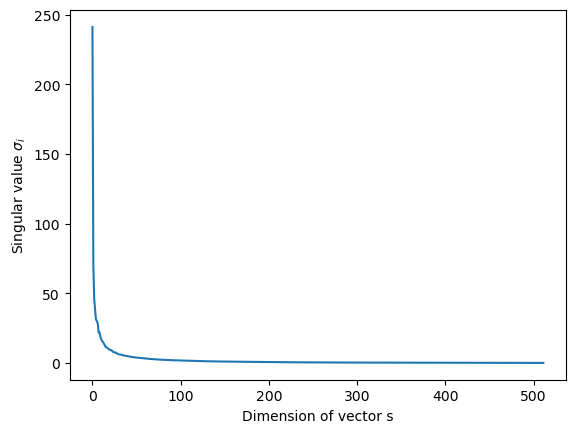

In [17]:
plt.plot(s)
plt.xlabel("Dimension of vector s")
plt.ylabel(r"Singular value $\sigma_i$")
plt.show()

As mentioned, the first entries of the singular value vector $s$ are the most significant and are ordered in decreasing magnitude. Beyond a certain index $r+1$, the singular values become nearly zero or exactly zero.

- Visualize the $k$-rank approximation of $X$ for different values of $r$. What do you observe?

I will use 5 different values of $r$.

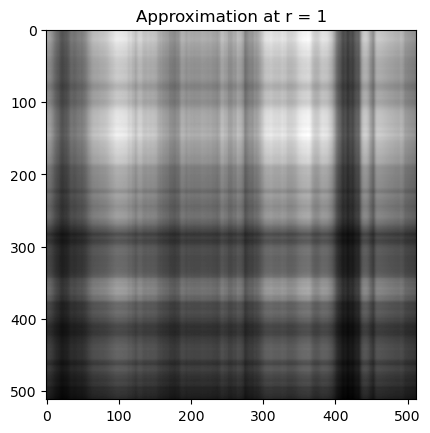

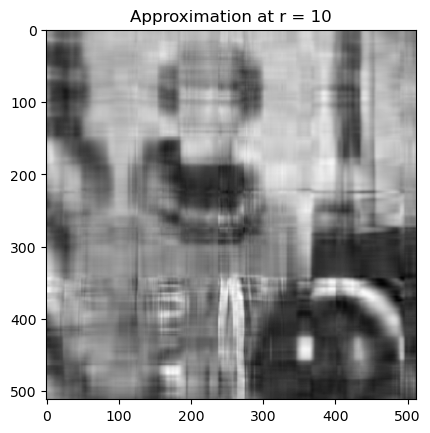

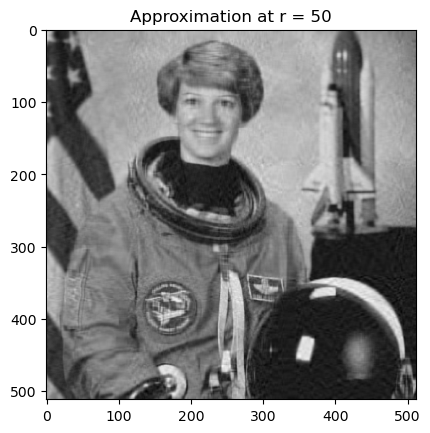

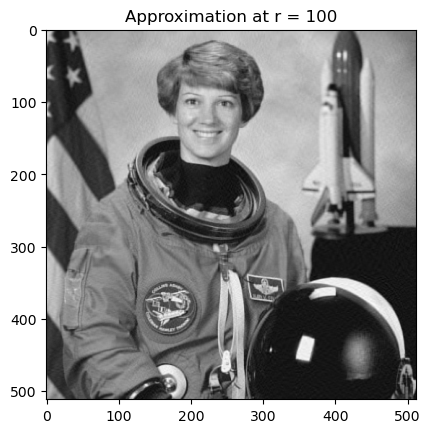

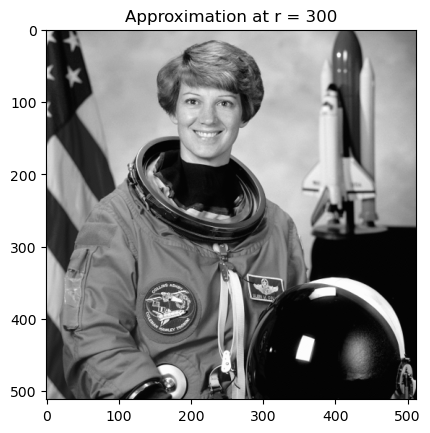

([array([[0.61128925, 0.60040484, 0.59109818, ..., 0.5418623 , 0.53674746,
          0.53096436],
         [0.61280491, 0.60189351, 0.59256378, ..., 0.54320582, 0.5380783 ,
          0.53228086],
         [0.61518434, 0.60423057, 0.59486462, ..., 0.54531501, 0.54016757,
          0.53434762],
         ...,
         [0.16926756, 0.16625364, 0.16367661, ..., 0.15004306, 0.14862675,
          0.14702539],
         [0.16706313, 0.16408845, 0.16154498, ..., 0.14808899, 0.14669113,
          0.14511063],
         [0.16373243, 0.16081706, 0.1583243 , ..., 0.14513658, 0.14376658,
          0.14221759]]),
  array([[0.4772862 , 0.44947396, 0.42331617, ..., 0.40162519, 0.40329933,
          0.4097735 ],
         [0.52903961, 0.50282302, 0.47782526, ..., 0.40242947, 0.40333569,
          0.40826215],
         [0.5681572 , 0.54286233, 0.51853126, ..., 0.40355639, 0.4038742 ,
          0.40765527],
         ...,
         [0.51981182, 0.51952883, 0.52354924, ..., 0.14398896, 0.12379141,
          0.0

In [18]:
def k_approx(show_img=True):  
    # 5 different values of 5 
    values = [1,10, 50, 100, 300]
    matrices = []
    
    for r in values:
        # create the approximate matrix
        A_k = np.zeros(X.shape)
        
        # compute the sum over all the dyad
        for i in range(0, r):
            
            sigma_i = s[i]
            
            u_i = U[:,i] 
            v_i = VT[i,:]
            dyad = sigma_i * np.outer(u_i,v_i)
            
            # sum
            A_k = A_k + dyad
            
        # use this list to show the plot    
        matrices.append(A_k)
        
        # show plot
        if(show_img):
            plt.imshow(A_k, cmap="grey")
            plt.title(f"Approximation at r = {r}")
            plt.show()
            
    return matrices, values

k_approx()

I observe that as $r$ increases, the image becomes more accurate. This is because, with higher values of $r$, the $k$-rank approximation of $X$ captures a greater number of important features, resulting in a more precise approximation.
Additionally, we can see that setting $k=100$ is sufficient to produce a well-formed image.

- Compute and plot the approximation error $\|X - X_k\|_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $X$.

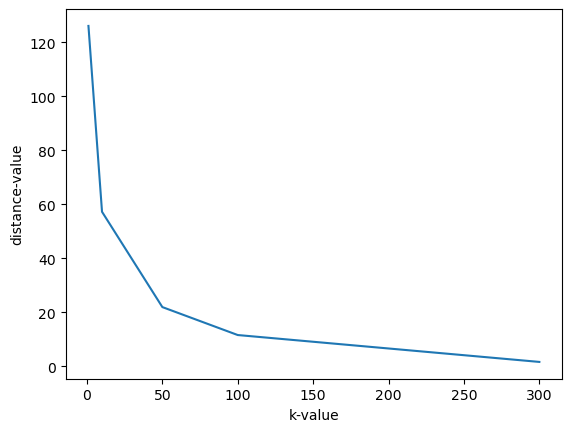

In [19]:
approx_errors = []
X_k, k_values = k_approx(False)

for i in range(len(X_k)):
    # compute Frobenius norm (as we are using matrices) to compute the approximation error
    approx_errors.append(np.linalg.norm(X-X_k[i], 'fro'))
    
# Plotting
plt.plot(k_values, approx_errors)
plt.xlabel("k-value")
plt.ylabel("distance-value")
plt.show()

As we expected, using a low value of $k$, we obtain an approximate matrix $X_k$ that is very different from the original image, resulting in a large error (the distance between $X$ and $X_k$ is quite high). However, with larger values of $k$, the approximate matrix becomes more similar to the initial one, and thus the error decreases.

- Plot the compression factor: $c_k=1-\frac{k (m + n+1)}{m  n}$ for increasing values of $k$.

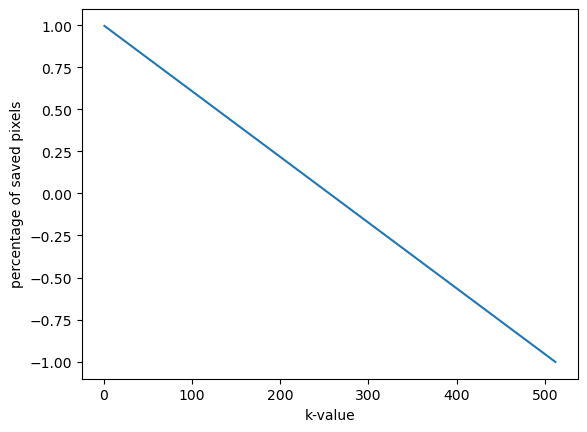

In [20]:
# prepare compression factor vector in order to plot the curve
c_k = []
k_values = range(1, min(X.shape) + 1)
m,n = X.shape

# compute compression factor for each k in k_values
for k in k_values:
    comp_factor = 1 - ((k*(m+n+1)) / (m*n))
    c_k.append(comp_factor)

plt.plot(k_values, c_k)
plt.xlabel("k-value")
plt.ylabel("percentage of saved pixels")
plt.show()

Based on everything we’ve discussed, we can observe that the compression factor (the percentage of pixels saved by storing  $X_k$  instead of  $X$ ) is equal to 1 when the difference between  $X_k$  and  $X$  is very high. As  $X_k$  becomes more similar to  $X$ , the percentage decreases accordingly.

- Compute the value $k$ such that $c_k=0$ (i.e. when the compressed image requires the same amount of information as the uncompressed image). What is the approximation error for this value of $k$? Comment.

Since $c_k=1-\frac{k (m + n+1)}{m  n}$, if $c_k=0$ then $k=\frac{mn}{m+n+1}$.

The value of k such that c_k = 0 is k = 255
the approximation error between the real image and the approximated one with k = 255, is 2.600778355394395 


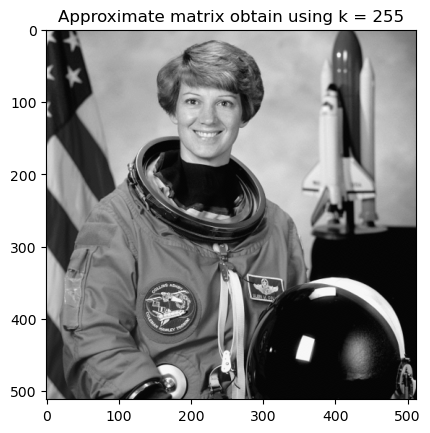

In [21]:
# inverse operation to find k starting from c_k (c_k == 0)
k = int((m*n)/(m+n+1))
print(f"The value of k such that c_k = 0 is k = {k}")

X_k = np.zeros(X.shape)

# compute approximation error between the original image (matrix) and the
# approximate matrix obtained by summing up k = 255 dyad
for i in range(0, k):
    # singular value
    sigma_i = s[i]
    
    # rank-1 matrix
    u_i = U[:,i] 
    v_i = VT[i,:]
    
    # dyad
    dyad = sigma_i * np.outer(u_i,v_i)
    
    # approximated matrix (sum)
    X_k = X_k + dyad

approx_error = np.linalg.norm(X-X_k,'fro')
print(f"the approximation error between the real image and the approximated one with k = {k}, is {approx_error} ")


plt.imshow(X_k, cmap="grey")
plt.title("Approximate matrix obtain using k = 255")
plt.show()

As we could expect, the approximation error is tiny, which is consistent with  $c_k = 0 $.